In [1]:
import os
import copy
import sys 
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__),'..')))
sys.path.append("..")

# Regular Modules
import scipy.sparse as sps
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
import datetime
import scipy.integrate as scint
#from numpy.random import default_rng
import numpy.ma as ma
import matplotlib.tri as tri
import scipy.io
import time 
from mpl_toolkits.mplot3d import axes3d
import argparse

# parallelization modules 
from math import nan
from joblib import Parallel, delayed
import multiprocess
import itertools
import tqdm

# # My Modules
import src.model_systems as model_systems
import src.helpers as helpers
import src.potentials as potentials
import src.diffusion_map as diffusion_map
from src.fem.distmesh import * 
from src.fem.FEM_TPT import *
import src.sampling as sampling
from datetime import date

In [83]:
data = np.load('uniform_committor_circular_2023-07-06 13:48:50.043468.npy', allow_pickle=True)

In [84]:
# run this for second gen dataset 
epsilons = data.item()['epsilons']
bias = data.item()['pointwise_errors']
bias = bias[:5,:]
epsilons = epsilons[:5]
epsilons_range, ntrials = bias.shape

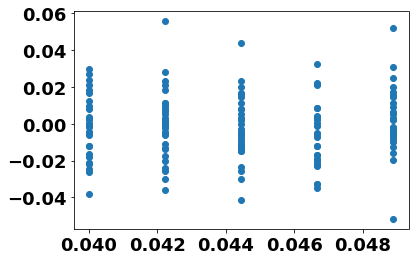

In [85]:
plt.scatter(epsilons.reshape((epsilons_range,1))@np.ones((1,ntrials)), bias)

In [86]:
# fit linear model
x = epsilons.reshape((epsilons_range,1))@np.ones((1,ntrials))
linear_fit = sklearn.linear_model.LinearRegression()
linear_fit.fit(x.reshape(-1,1), bias.reshape(-1,1))
y = linear_fit.predict(epsilons.reshape(-1,1))

In [87]:
# compute RMSE 
RMSE = np.sqrt(np.mean((y.reshape((epsilons_range,1))@np.ones((1,ntrials)) - bias)**2, axis=1)).reshape(y.shape)
y_low = y-RMSE
y_high = y+RMSE

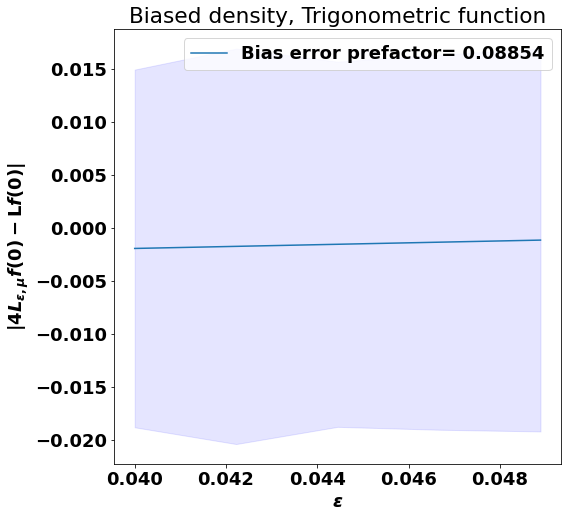

In [88]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(8,8))
# p1 = ax.scatter(x,np.abs(bias), alpha=0.2,label="Bias error prefactor= " + str(round(linear_fit.coef_[0,0],5)))
p2 = ax.plot(epsilons,y,label="Bias error prefactor= " + str(round(linear_fit.coef_[0,0],5)))
p1 = ax.fill_between(epsilons,y_low.flatten(), y_high.flatten(), color = 'blue', alpha=0.1)
# ax.set(ylim=(0.0,0.04))
ax.set(ylabel = r'$|4L_{\epsilon,\mu}f(0) - \mathbf{L} f(0)|$', xlabel = "$\epsilon$");
ax.set(title="Biased density, Trigonometric function")
ax.legend(loc = 'best')
# fig.savefig("Biased + Trigpoly", bbox_inches="tight")